## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8]

In [7]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Regulizer = 0.010000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.

50000/50000 [==============================] - 15s 297us/step - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 16s 324us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 16s 327us/step - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 15s 303us/step - loss: 2.4626 - acc: 0.0985 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 16s 319us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 15s 304us/step - loss: 2.4626 - acc: 0.0954 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 35/50
50000/50000 [=======

Epoch 29/50
50000/50000 [==============================] - 15s 295us/step - loss: 3.6038 - acc: 0.5762 - val_loss: 3.7081 - val_acc: 0.5261
Epoch 30/50
50000/50000 [==============================] - 18s 356us/step - loss: 3.5500 - acc: 0.5795 - val_loss: 3.6758 - val_acc: 0.5245
Epoch 31/50
50000/50000 [==============================] - 15s 298us/step - loss: 3.4961 - acc: 0.5816 - val_loss: 3.6261 - val_acc: 0.5244
Epoch 32/50
50000/50000 [==============================] - 15s 294us/step - loss: 3.4413 - acc: 0.5862 - val_loss: 3.5824 - val_acc: 0.5223
Epoch 33/50
50000/50000 [==============================] - 15s 295us/step - loss: 3.3911 - acc: 0.5867 - val_loss: 3.5788 - val_acc: 0.5056
Epoch 34/50
50000/50000 [==============================] - 15s 294us/step - loss: 3.3394 - acc: 0.5922 - val_loss: 3.6029 - val_acc: 0.4897
Epoch 35/50
50000/50000 [==============================] - 16s 317us/step - loss: 3.2885 - acc: 0.5936 - val_loss: 3.4440 - val_acc: 0.5268
Epoch 36/50
50000/50

Epoch 30/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.1175 - acc: 0.6066 - val_loss: 1.3413 - val_acc: 0.5262
Epoch 31/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.1025 - acc: 0.6124 - val_loss: 1.3953 - val_acc: 0.5130
Epoch 32/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.0919 - acc: 0.6157 - val_loss: 1.3507 - val_acc: 0.5258
Epoch 33/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.0752 - acc: 0.6193 - val_loss: 1.3456 - val_acc: 0.5304
Epoch 34/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.0638 - acc: 0.6259 - val_loss: 1.4153 - val_acc: 0.5076
Epoch 35/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.0537 - acc: 0.6289 - val_loss: 1.4016 - val_acc: 0.5116
Epoch 36/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.0398 - acc: 0.6328 - val_loss: 1.3593 - val_acc: 0.5211
Epoch 37/50
50000/50

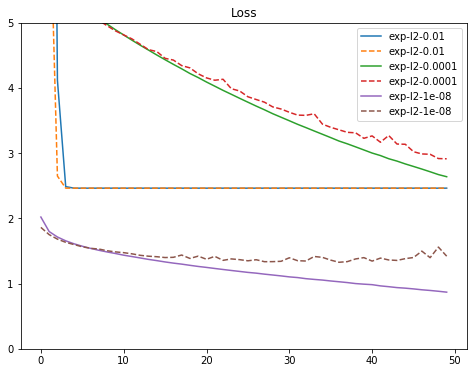

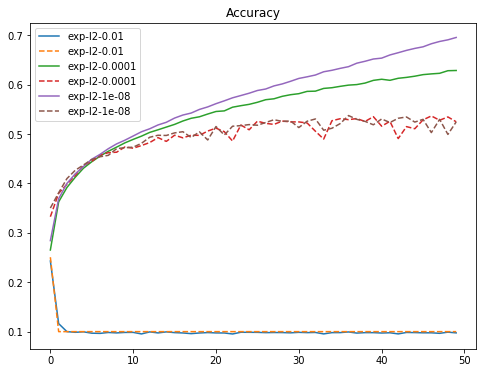

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()